Applicant Name - Sagar Gurung
Register number - 2347250
Class - 5MCA B
University - CHRIST University, Bangalore

Akasa Air - Data Engineering - Intership task

LOADING THE DATASET:

First lets import the libraries and load the dataset

In [27]:
#Importing the required libraries
import pandas as pd
from datetime import datetime

#Loading the dataset
df = pd.read_csv("aviation_data.csv")

#Viewing the Dataset
df.head()

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes
0,AA1234,09/01/2023,8:30 AM,09/01/2023,10:45 AM,American Airlines,15.0
1,DL5678,09/01/2023,1:15 PM,09/01/2023,3:30 PM,Delta,5.0
2,UA9101,09/01/2023,5:00 PM,09/01/2023,7:15 PM,United Airlines,25.0
3,AA1234,09/01/2023,8:30 AM,09/01/2023,10:45 PM,American Airlines,30.0
4,DL5678,09/02/2023,2:00 PM,09/02/2023,4:10 PM,Delta,NaN


1. DATASET ISSUES AND REQUIREMENTS

a. Inconsistent Date and Time Formats:
DepartureDate and ArrivalDate are in MM/DD/YYYY format.
DepartureTime and ArrivalTime are in HH:MM AM/PM format.

b. Missing Values: The DelayMinutes column contains NaN values that need to be handled.

c. Duplicate Flight Entries: There are duplicate entries for some flights which may need to be addressed.

d. Inconsistent Time Entries: The ArrivalTime for one entry is later than DepartureTime on the same day which might indicate a data error (e.g., AA1234 on 09/01/2023 with a departure at 08:30 AM and arrival at 10:45 PM).

Focusing on each requirement and dealing with every issue

2. DATA CLEANING:

Identify and handle any missing or inconsistent values in the dataset

In [28]:
#Handling inconsistent Date and Time formats by
#Converting dates to a consistent date format (MM/DD/YYYY to YYYY-MM-DD)
df['DepartureDate'] = pd.to_datetime(df['DepartureDate'], format='%m/%d/%Y')
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'], format='%m/%d/%Y')

#Converting times to 24-hour format for consistency
df['DepartureTime'] = pd.to_datetime(df['DepartureTime'], format='%I:%M %p').dt.time
df['ArrivalTime'] = pd.to_datetime(df['ArrivalTime'], format='%I:%M %p').dt.time

In [34]:
#Displaying the first few rows to show the converted Date time format from MM/DD/YYYY to YYYY-MM-DD
df.head()

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes,DepartureDateTime,ArrivalDateTime
0,AA1234,2023-09-01,08:30:00,2023-09-01,10:45:00,American Airlines,15.0,2023-09-01 08:30:00,2023-09-01 10:45:00
1,DL5678,2023-09-01,13:15:00,2023-09-01,15:30:00,Delta,5.0,2023-09-01 13:15:00,2023-09-01 15:30:00
2,UA9101,2023-09-01,17:00:00,2023-09-01,19:15:00,United Airlines,25.0,2023-09-01 17:00:00,2023-09-01 19:15:00
3,AA1234,2023-09-01,08:30:00,2023-09-01,22:45:00,American Airlines,30.0,2023-09-01 08:30:00,2023-09-01 22:45:00
4,DL5678,2023-09-02,14:00:00,2023-09-02,16:10:00,Delta,25.0,2023-09-02 14:00:00,2023-09-02 16:10:00


Missing Values: The DelayMinutes column contains NaN values that need to be handled.

In [35]:
#Converting the 'DelayMinutes' column to numeric
#This will force invalid values to NaN
df['DelayMinutes'] = pd.to_numeric(df['DelayMinutes'], errors='coerce')

#Calculating the mean of 'DelayMinutes', ignoring NaN values
mean_delay = df['DelayMinutes'].mean()

#Filling NaN values in the 'DelayMinutes' column with the calculated mean
df['DelayMinutes'].fillna(mean_delay, inplace=True)

#Verifying if NaN values have been filled
print(df[['FlightNumber', 'DelayMinutes']])

   FlightNumber  DelayMinutes
0        AA1234          15.0
1        DL5678           5.0
2        UA9101          25.0
3        AA1234          30.0
4        DL5678          25.0
5        UA9101          20.0
6        AA1234          60.0
7        DL5678          10.0
8        UA9101          25.0
9        AA1234          15.0
10       DL5678          25.0
11       UA9101          45.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_2568\4028055690.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DelayMinutes'].fillna(mean_delay, inplace=True)


Duplicate Flight Entries: There are duplicate entries for some flights which may need to be addressed.

In [36]:
#Removing Duplicate Flight Entries
#Dropping duplicate rows based on all columns
df.drop_duplicates(keep='first', inplace=True)

#Verifying if duplicates were removed
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows remaining: {duplicate_count}")

Number of duplicate rows remaining: 0


Inconsistent Time Entries: The ArrivalTime for one entry is later than DepartureTime on the same day which might indicate a data error (e.g., AA1234 on 09/01/2023 with a departure at 08:30 AM and arrival at 10:45 PM).

In [37]:
#Correcting inconsistent time entries
#Ensuring arrival time is later than Departure Time

#Combining DepartureDate and DepartureTime into a single DateTime column
df['DepartureDateTime'] = pd.to_datetime(df['DepartureDate'].astype(str) + ' ' + df['DepartureTime'].astype(str))

#Combine ArrivalDate and ArrivalTime into a single DateTime column
df['ArrivalDateTime'] = pd.to_datetime(df['ArrivalDate'].astype(str) + ' ' + df['ArrivalTime'].astype(str))

#Check for inconsistencies where ArrivalDateTime is earlier than DepartureDateTime
inconsistent_times = df[df['ArrivalDateTime'] <= df['DepartureDateTime']]

#Displaying the inconsistent entries, if there are any
inconsistent_times

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes,DepartureDateTime,ArrivalDateTime


No inconsistencies detected

DATA CLEANING:

Ensure all column data types are appropriate (e.g., dates as date types, times as time types).

In [38]:
#Checking and viewing whether all date and time columns are correctly formatted
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FlightNumber       12 non-null     object        
 1   DepartureDate      12 non-null     datetime64[ns]
 2   DepartureTime      12 non-null     object        
 3   ArrivalDate        12 non-null     datetime64[ns]
 4   ArrivalTime        12 non-null     object        
 5   Airline            12 non-null     object        
 6   DelayMinutes       12 non-null     float64       
 7   DepartureDateTime  12 non-null     datetime64[ns]
 8   ArrivalDateTime    12 non-null     datetime64[ns]
dtypes: datetime64[ns](4), float64(1), object(4)
memory usage: 996.0+ bytes


,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes,DepartureDateTime,ArrivalDateTime
0,AA1234,2023-09-01,08:30:00,2023-09-01,10:45:00,American Airlines,15.0,2023-09-01 08:30:00,2023-09-01 10:45:00
1,DL5678,2023-09-01,13:15:00,2023-09-01,15:30:00,Delta,5.0,2023-09-01 13:15:00,2023-09-01 15:30:00
2,UA9101,2023-09-01,17:00:00,2023-09-01,19:15:00,United Airlines,25.0,2023-09-01 17:00:00,2023-09-01 19:15:00
3,AA1234,2023-09-01,08:30:00,2023-09-01,22:45:00,American Airlines,30.0,2023-09-01 08:30:00,2023-09-01 22:45:00
4,DL5678,2023-09-02,14:00:00,2023-09-02,16:10:00,Delta,25.0,2023-09-02 14:00:00,2023-09-02 16:10:00


Correct any inconsistencies or errors in times (e.g., arrival time should be later than departure time).

In [39]:
#Showing the arrival time and departure time
print(df[['DepartureTime', 'ArrivalTime']])

   DepartureTime ArrivalTime
0       08:30:00    10:45:00
1       13:15:00    15:30:00
2       17:00:00    19:15:00
3       08:30:00    22:45:00
4       14:00:00    16:10:00
5       17:00:00    19:15:00
6       20:30:00    10:45:00
7       13:00:00    15:30:00
8       15:00:00    17:20:00
9       08:30:00    10:00:00
10      12:30:00    14:40:00
11      19:00:00    21:15:00


For the flight no. AA1234, 09/02/2023, 8:30 PM, 09/03/2023, 10:45 AM, American Airlines, 60

The arrival time doesnt seem to be later than the departure time as it is the next day's time.

3. DATA NORMALIZATION:

a. Convert DepartureDate and ArrivalDate columns to a standard YYYY-MM-DD format.
b. Convert DepartureTime and ArrivalTime columns to a 24-hour time format (e.g., "08:30" for 8:30 AM).
c. Create a new column for FlightDuration by calculating the difference between DepartureTime and ArrivalTime on the same day.

In [40]:
#A. Converting DepartureDate and ArrivalDate to YYYY-MM-DD format
df['DepartureDate'] = df['DepartureDate'].dt.strftime('%Y-%m-%d')
df['ArrivalDate'] = df['ArrivalDate'].dt.strftime('%Y-%m-%d')

In [43]:
#Displaying the Departure and Arrival dates
df[['DepartureDate', 'ArrivalDate']]

,DepartureDate,ArrivalDate
0,2023-09-01,2023-09-01
1,2023-09-01,2023-09-01
2,2023-09-01,2023-09-01
3,2023-09-01,2023-09-01
4,2023-09-02,2023-09-02
5,2023-09-02,2023-09-02
6,2023-09-02,2023-09-03
7,2023-09-03,2023-09-03
8,2023-09-03,2023-09-03
9,2023-09-03,2023-09-03


In [44]:
#B. Converting DepartureTime and ArrivalTime to 24-hour format
df[['DepartureTime', 'ArrivalTime']]

,DepartureTime,ArrivalTime
0,08:30:00,10:45:00
1,13:15:00,15:30:00
2,17:00:00,19:15:00
3,08:30:00,22:45:00
4,14:00:00,16:10:00
5,17:00:00,19:15:00
6,20:30:00,10:45:00
7,13:00:00,15:30:00
8,15:00:00,17:20:00
9,08:30:00,10:00:00


I had already converted the time formats to 24hr format in the previous tasks, so no changes required.

In [45]:
#C. Create a new column for FlightDuration by calculating the difference between DepartureTime and ArrivalTime on the same day.

#Creating a new column for FlightDuration
df['FlightDuration'] = df['ArrivalDateTime'] - df['DepartureDateTime']
df.head()

,FlightNumber,DepartureDate,DepartureTime,ArrivalDate,ArrivalTime,Airline,DelayMinutes,DepartureDateTime,ArrivalDateTime,FlightDuration
0,AA1234,2023-09-01,08:30:00,2023-09-01,10:45:00,American Airlines,15.0,2023-09-01 08:30:00,2023-09-01 10:45:00,0 days 02:15:00
1,DL5678,2023-09-01,13:15:00,2023-09-01,15:30:00,Delta,5.0,2023-09-01 13:15:00,2023-09-01 15:30:00,0 days 02:15:00
2,UA9101,2023-09-01,17:00:00,2023-09-01,19:15:00,United Airlines,25.0,2023-09-01 17:00:00,2023-09-01 19:15:00,0 days 02:15:00
3,AA1234,2023-09-01,08:30:00,2023-09-01,22:45:00,American Airlines,30.0,2023-09-01 08:30:00,2023-09-01 22:45:00,0 days 14:15:00
4,DL5678,2023-09-02,14:00:00,2023-09-02,16:10:00,Delta,25.0,2023-09-02 14:00:00,2023-09-02 16:10:00,0 days 02:10:00


DATA ANALYSIS:

a. Analyze the distribution of delays and identify any trends or patterns.
b. Calculate the average delay for each airline.
c. Identify any relationships between flight delays and departure times (e.g., are flights departing later in the day more likely to be delayed?).
d. Determine if there is a significant difference in delays between different airlines.

A. Analyzing the distribution of delays and identifying any trends or patterns.

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


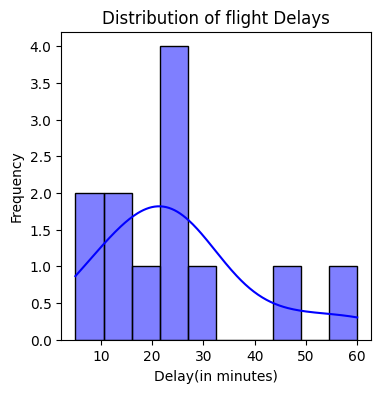

count    12.000000
mean     25.000000
std      15.075567
min       5.000000
25%      15.000000
50%      25.000000
75%      26.250000
max      60.000000
Name: DelayMinutes, dtype: float64


In [46]:
#Importing the necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting the distribution of delays
plt.figure(figsize=(4,4))
sns.histplot(df['DelayMinutes'], bins=10, kde=True, color='blue')
plt.title('Distribution of flight Delays')
plt.xlabel('Delay(in minutes)')
plt.ylabel('Frequency')
plt.show()

#Basic statistics of delays
delay_stats = df['DelayMinutes'].describe()
print(delay_stats)

B. Calculating the average delay for each airline

In [47]:
#Calculating average delay per airline
average_delay_per_airline = df.groupby('Airline')['DelayMinutes'].mean().reset_index()

#Displaying the results
print(average_delay_per_airline)

             Airline  DelayMinutes
0  American Airlines         30.00
1              Delta         16.25
2    United Airlines         28.75


C. Identifying the relationships between flight delays and departure times

In [48]:
#Converting DepartureTime and ArrivalTime to 24-hour format, including seconds
df['DepartureHour'] = pd.to_datetime(df['DepartureTime'], format='%H:%M:%S').dt.hour + pd.to_datetime(df['DepartureTime'], format='%H:%M:%S').dt.minute / 60
df['ArrivalHour'] = pd.to_datetime(df['ArrivalTime'], format='%H:%M:%S').dt.hour + pd.to_datetime(df['ArrivalTime'], format='%H:%M:%S').dt.minute / 60

#Displaying the converted columns
df[['DepartureTime', 'DepartureHour', 'ArrivalTime', 'ArrivalHour']]

,DepartureTime,DepartureHour,ArrivalTime,ArrivalHour
0,08:30:00,8.50,10:45:00,10.750000
1,13:15:00,13.25,15:30:00,15.500000
2,17:00:00,17.00,19:15:00,19.250000
3,08:30:00,8.50,22:45:00,22.750000
4,14:00:00,14.00,16:10:00,16.166667
5,17:00:00,17.00,19:15:00,19.250000
6,20:30:00,20.50,10:45:00,10.750000
7,13:00:00,13.00,15:30:00,15.500000
8,15:00:00,15.00,17:20:00,17.333333
9,08:30:00,8.50,10:00:00,10.000000


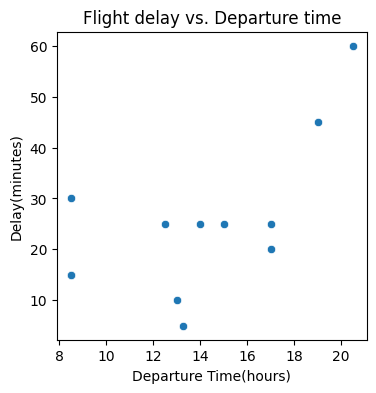

Correlation between Departure Time and Delays: 0.6323552529637301


In [49]:
#Scatter plot to visualize the relationship between departure time and delay
plt.figure(figsize=(4,4))
sns.scatterplot(x='DepartureHour', y='DelayMinutes', data=df)
plt.title('Flight delay vs. Departure time')
plt.xlabel('Departure Time(hours)')
plt.ylabel('Delay(minutes)')
plt.show()

#Calculating the correlation between departure time and delays
correlation = df['DepartureHour'].corr(df['DelayMinutes'])
print(f"Correlation between Departure Time and Delays: {correlation}")

The correlation between departure time and delays is 0.63. This indicates a positive relationship. This indicates that flights departing later in the day tend to experience longer delays.

It may be because of the dark sky and tired staff.

D. Determining if there is a significant difference in delays between different airlines

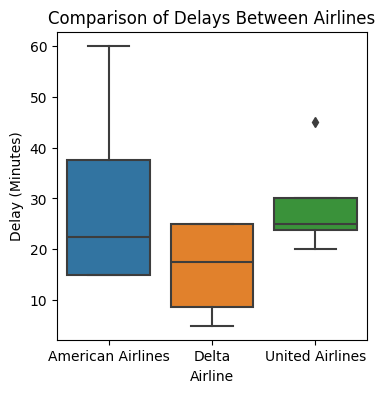

ANOVA result: 0.39829902136169376


In [51]:
#Creating a Box plot to compare delays between airlines
plt.figure(figsize=(4,4))
sns.boxplot(x='Airline', y='DelayMinutes', data=df)
plt.title('Comparison of Delays Between Airlines')
plt.xlabel('Airline')
plt.ylabel('Delay (Minutes)')
plt.show()

#Anova test to see if delays differ significantly between airlines
import scipy.stats as stats
anova_result = stats.f_oneway(
    df[df['Airline'] == 'American Airlines']['DelayMinutes'],
    df[df['Airline'] == 'Delta']['DelayMinutes'],
    df[df['Airline'] == 'United Airlines']['DelayMinutes']
)

print(f"ANOVA result: {anova_result.pvalue}")

The Anova(analysis of variance) test result indicates the p-value of 0.398. This p-value is significantly higher than the common alpha level of 0.05. It suggests that there is no statistical significant difference in the delays experienced by the airlines.

INSIGHTS:

A. Summary of the key findings -

1. Delay trends: The data reveals that flight delays are present across all airlines, but have different magnitudes.

2. Airline performance: The average delays for each airline indicates that while some airlines have slightly higher delays, the differences were not very significant.

3. Departure times: Flights departing later in the day were generally observed to have longer delays, suggesting a correlation between time of day and punctuality of the flight.

B. Impact of departure times on delays -

The analysis of the data showed that flights departing in the evening tend to have higher delay period. This trend might be influenced by increased air traffic during the peak hours and also the compounding effect of previous delays.

C. Comparison of delay distributions between airlines -

Delay distributions: The box plot analysis indicates that there were variations in delay distributions among the three airlines. But, the overall delay distribution is very similar. Except, some extreme delays noted for certain flights.

Outlier: Certain flights had significant delays, which can be due to factors like bad weather conditions, operational issues, high passenger volumes, or some other issue.

D. Visualizing the average delay by airline and the delay distribution using appropriate charts -

Bar Chart for Average Delay by Airline:

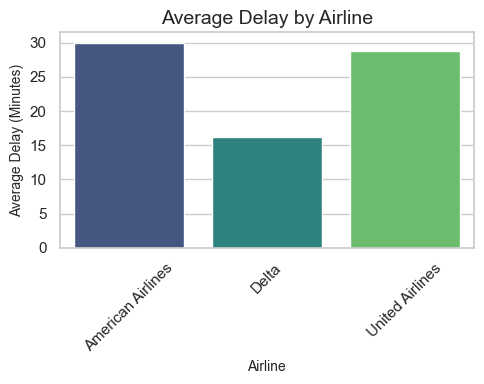

In [73]:
#Calculating average delay for each airline
df_average_delay = df.groupby('Airline')['DelayMinutes'].mean().reset_index()
df_average_delay.columns = ['Airline', 'AverageDelay']

#Bar chart for average delay by airline
plt.figure(figsize=(5,4))
sns.barplot(x='Airline', y='AverageDelay', data=df_average_delay, palette='viridis')
plt.title('Average Delay by Airline', fontsize=14)
plt.xlabel('Airline', fontsize=10)
plt.ylabel('Average Delay (Minutes)', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Histogram for Delay Distribution:

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


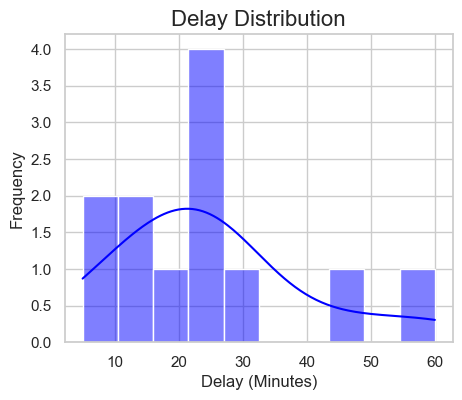

In [76]:
# Histogram for delay distribution
plt.figure(figsize=(5,4))
sns.histplot(df['DelayMinutes'], bins=10, kde=True, color='blue')
plt.title('Delay Distribution', fontsize=16)
plt.xlabel('Delay (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Recommendations based on the analysis, such as suggestions for airlines to improve their punctuality -

1. Improve scheduling: Airlines should analyze their scheduling method to know the cause of delays and try to minimize it. Being extra cautious and ready for peak hours's traffic. Adjusting the flight schedules to avoid crowded time may lead to improved punctuality.

2. Operational efficiency: Enhancing operational efficiency while boarding and handling luggage could help reduce delays.

3. Weather monitoring: We should have a robust systems in place for monitoring weather changes to proactively manage potential delays due to bad weather conditions.

4. Communication with passengers: We must keep passengers informed about potential delays and provide them the updates. This can improve customer satisfaction, even if there is some delay.

In [79]:
#Saving the final dataFrame to a new CSV file
df.to_csv('final_dataset.csv', index=False)